构建节点

In [1]:
import numpy as np
k1 = np.arange(0,4,1)
k2 = np.arange(0,6,1)

x1 = np.cos(np.pi * (k1+1/2)/4)
x2 = np.cos(np.pi * (k2+1/2)/6)

定义函数

In [2]:
def f(x):
    return x**6+3*(x**5)+4*(x**4)+(x**3)/3+2*(x**2)+x-10
#注意要将函数变换到-1，1上
y1 = f(2*x1+1)
y2 = f(2*x2+1)

创建参数列表c，并根据公式（见ppt）计算每个c的值
注意，c0的值在计算时已经考虑过delta，也就是说S(x)的表达式中不再需要-c0/2

In [3]:
c1=[0] * 4
c1[0] = np.sum(y1)/4
for m in range(1,4):
    res = np.cos(m*np.pi*(k1+1/2)/4)
    c1[m] = np.sum(res * y1)*2/4
print(c1)

[369.3333333333333, 663.9999999999999, 443.99999999999994, 204.66666666666669]


In [4]:
c2=[0] * 6
c2[0] = np.sum(y2)/6
for m in range(1,6):
    res = np.cos(m*np.pi*(k2+1/2)/6)
    c2[m] = np.sum(res * y2)*2/6
print(c2)

[369.33333333333326, 663.9999999999999, 445.99999999999983, 222.66666666666663, 80.00000000000006, 17.999999999999904]


定义chebyshev函数，并用其计算节点的y值

In [5]:
def chebyshev1(x):
    x = x/2 -0.5
    res = 0
    for i in range(4):
        res += c1[i] * np.cos(i*np.arccos(x))
    return res

In [6]:
def chebyshev2(x):
    x = x/2 -0.5
    res = 0
    for i in range(6):
        res += c2[i] * np.cos(i*np.arccos(x))
    return res

构建很多个点，然后分别用f(x)和chebyshev1(x),chebyshev2(x)计算y值

In [7]:
xshowlist = np.arange(-1,3.2,0.05)
fshowlist = f(xshowlist)
chshowlist1 = chebyshev1(xshowlist)
chshowlist2 = chebyshev2(xshowlist)

C:\Users\10908\AppData\Local\Temp\ipykernel_14012\2955248880.py:5: RuntimeWarning: invalid value encountered in arccos
  res += c1[i] * np.cos(i*np.arccos(x))


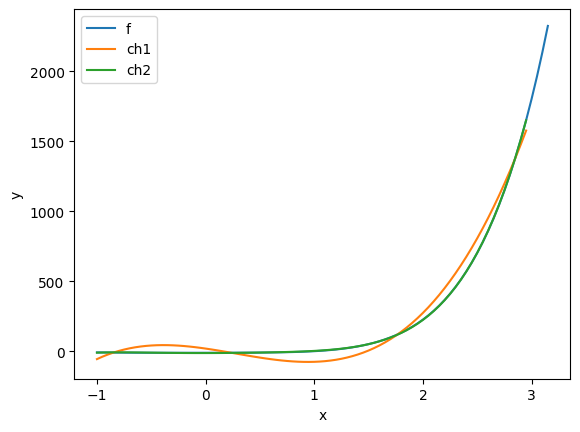

In [8]:
import matplotlib.pyplot as plt

plt.plot(xshowlist, fshowlist, label='f')
plt.plot(xshowlist, chshowlist1, label='ch1')
plt.plot(xshowlist, chshowlist2, label='ch2')

plt.legend()

plt.xlabel('x')
plt.ylabel('y')

plt.show()